In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data.csv', index_col='id')
data = data.drop(columns=['smpl'])
data.head()

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_409,feature_410,feature_411,feature_412,feature_413,feature_414,feature_415,feature_416,feature_417,feature_418
id,,,,,,,,,,,,,,,,,,,,,
0,0,0.468142,-1.045346,0.0,0.384487,0.435121,-1.178548,0.124543,1.801544,0.332028,...,-0.361507,-1.026853,0.0,1.418600,-0.929668,1.284014,0.731842,0.801786,-0.728297,-0.412095
1,0,-0.760983,0.515132,0.0,-1.673905,-0.393862,-1.584207,-0.439778,0.796104,-1.331832,...,-0.546275,-1.489542,0.0,-0.622007,-0.473156,0.780020,0.648577,0.646100,-0.789362,0.083349
2,0,1.658855,0.915052,0.0,-0.581082,0.477199,-0.622226,0.390642,0.753299,0.400727,...,-0.485999,0.586012,0.0,0.361481,-0.364566,-1.318596,-0.385155,0.140133,0.123245,-0.670030
3,0,-0.638854,0.314099,0.0,0.000919,1.102342,-0.807371,0.329158,0.484305,0.412519,...,0.321985,-0.075827,0.0,-1.629672,0.876864,0.411271,0.433440,0.997364,2.829590,-1.275588
4,0,-1.091376,0.859811,0.0,-0.505439,1.665086,-0.912464,-0.332054,0.707705,-1.534071,...,0.828886,0.140387,0.0,-0.624304,-2.197691,-1.479267,-0.465917,-0.014757,-0.320434,-0.511896


NaN ячейки отсутствуют 

In [4]:
missing_values = data.isnull().sum().sort_values(ascending=False)
sum(missing_values)

0

Гистограммы случайного подмножества признаков

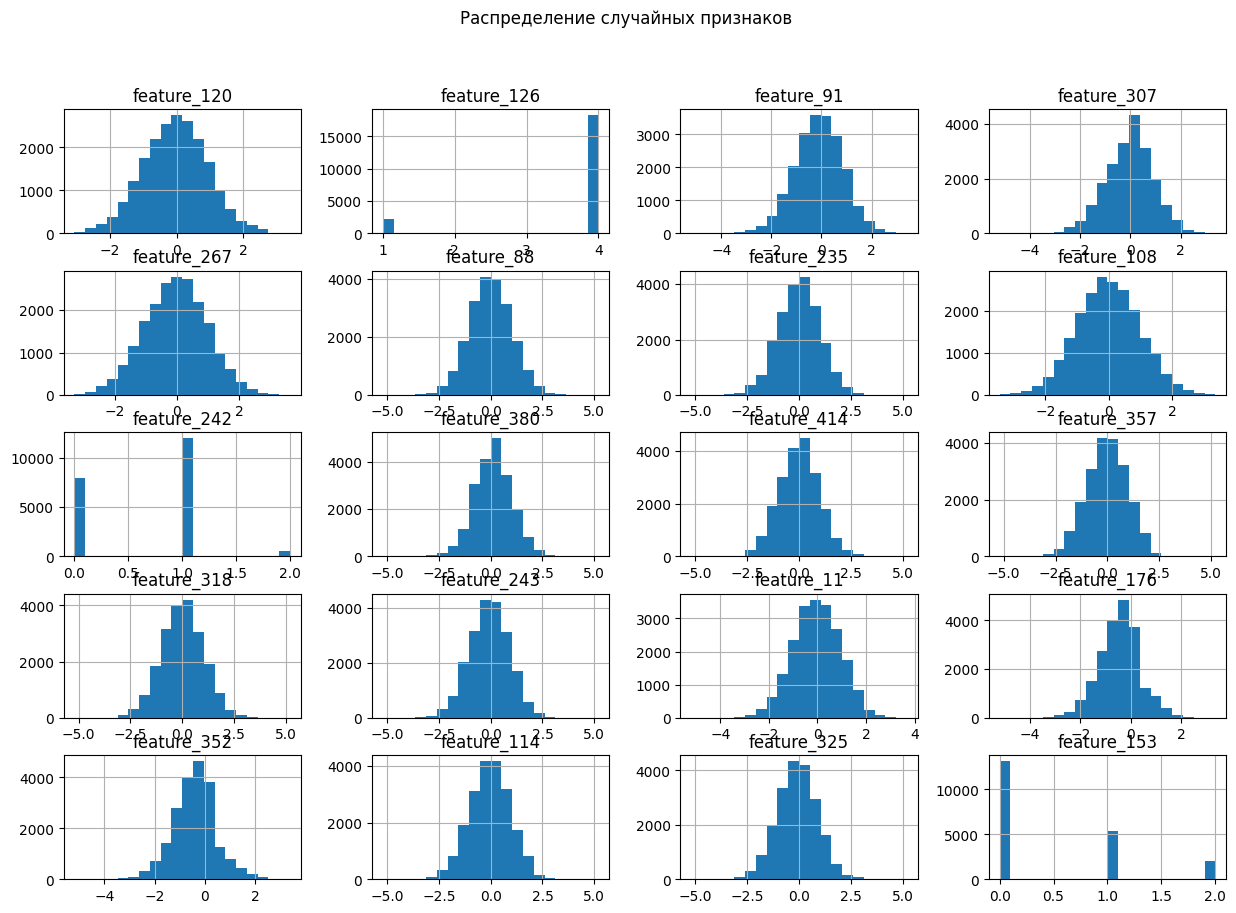

In [5]:
import numpy as np

random_features = np.random.choice(data.columns, size=20, replace=False)
data[random_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Распределение случайных признаков")
plt.show()

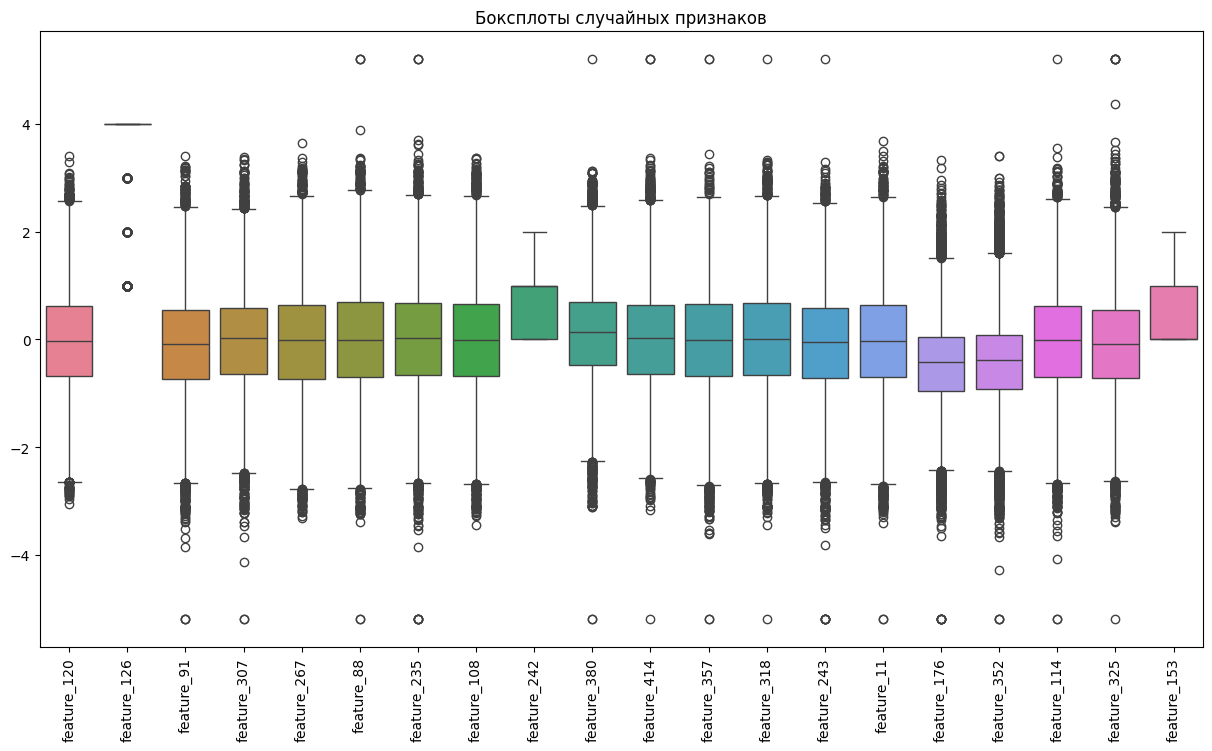

In [6]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[random_features])
plt.title("Боксплоты случайных признаков")
plt.xticks(rotation=90)
plt.show()

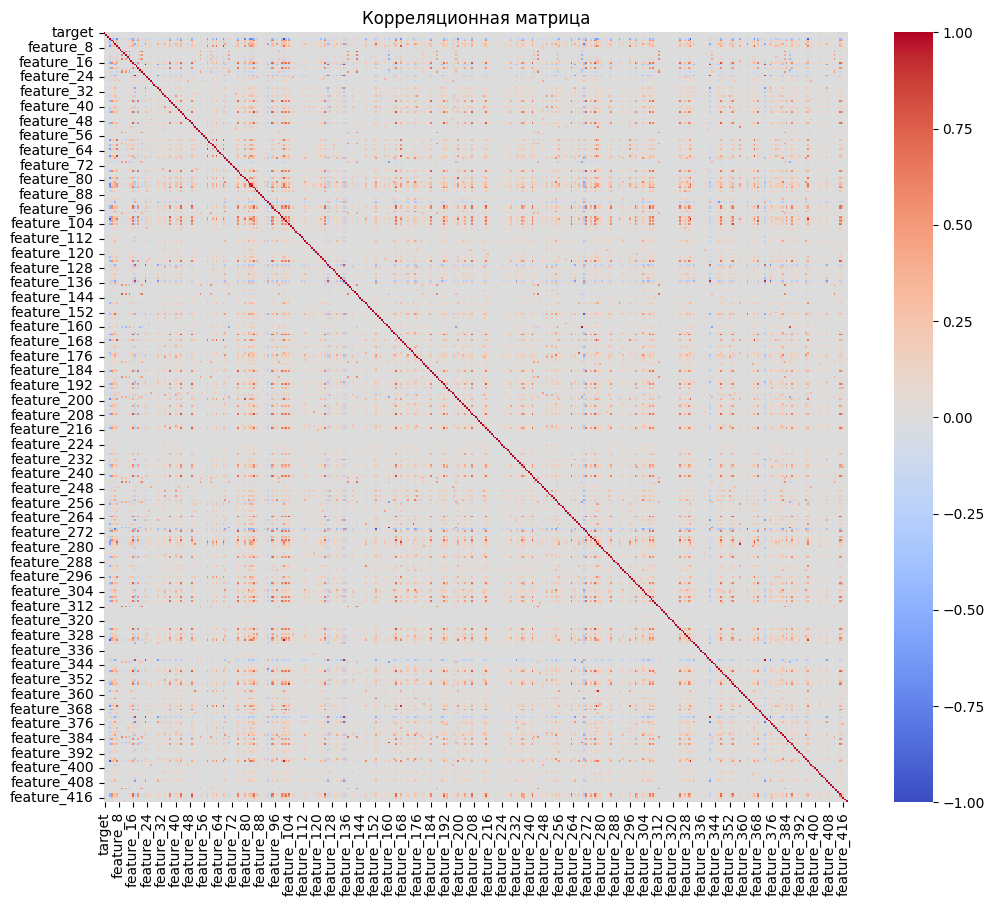

In [7]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

In [8]:
high_corr = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix < 1.0)].stack().reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_corr)

        Feature 1    Feature 2  Correlation
0       feature_4   feature_16     0.624546
1       feature_4   feature_19     0.537742
2       feature_4   feature_37     0.591170
3       feature_4   feature_43     0.620388
4       feature_4   feature_49     0.576996
...           ...          ...          ...
1799  feature_415  feature_354     0.559556
1800  feature_415  feature_368     0.676846
1801  feature_415  feature_384     0.543740
1802  feature_415  feature_387     0.532980
1803  feature_415  feature_414     0.604469

[1804 rows x 3 columns]


Признаки с сильной прямой зависимостью

In [9]:
high_corr = correlation_matrix[(correlation_matrix <= -0.5)].stack().reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_corr)

       Feature 1    Feature 2  Correlation
0      feature_3    feature_7    -0.666455
1      feature_3   feature_16    -0.501396
2      feature_3   feature_58    -0.624330
3      feature_3   feature_63    -0.598582
4      feature_3   feature_67    -0.673777
..           ...          ...          ...
151  feature_407   feature_23    -0.588373
152  feature_407  feature_126    -0.522917
153  feature_407  feature_135    -0.636914
154  feature_407  feature_341    -0.595616
155  feature_407  feature_372    -0.587599

[156 rows x 3 columns]


Присутствуют признаки с сильной обратной зависимостью

In [10]:
high_corr = correlation_matrix[(correlation_matrix > -0.5) & (correlation_matrix < 0.5)].stack().reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_corr)

          Feature 1    Feature 2  Correlation
0            target    feature_1     0.005802
1            target    feature_2     0.000028
2            target    feature_3     0.079142
3            target    feature_4    -0.054979
4            target    feature_5    -0.033968
...             ...          ...          ...
173177  feature_418  feature_413     0.014929
173178  feature_418  feature_414     0.032100
173179  feature_418  feature_415     0.036631
173180  feature_418  feature_416     0.007644
173181  feature_418  feature_417     0.007824

[173182 rows x 3 columns]


Большинство признаков не имеют зависимость.

Большинство признаков распределено нормально, однако есть признаки, в которых присутствуют выбросы

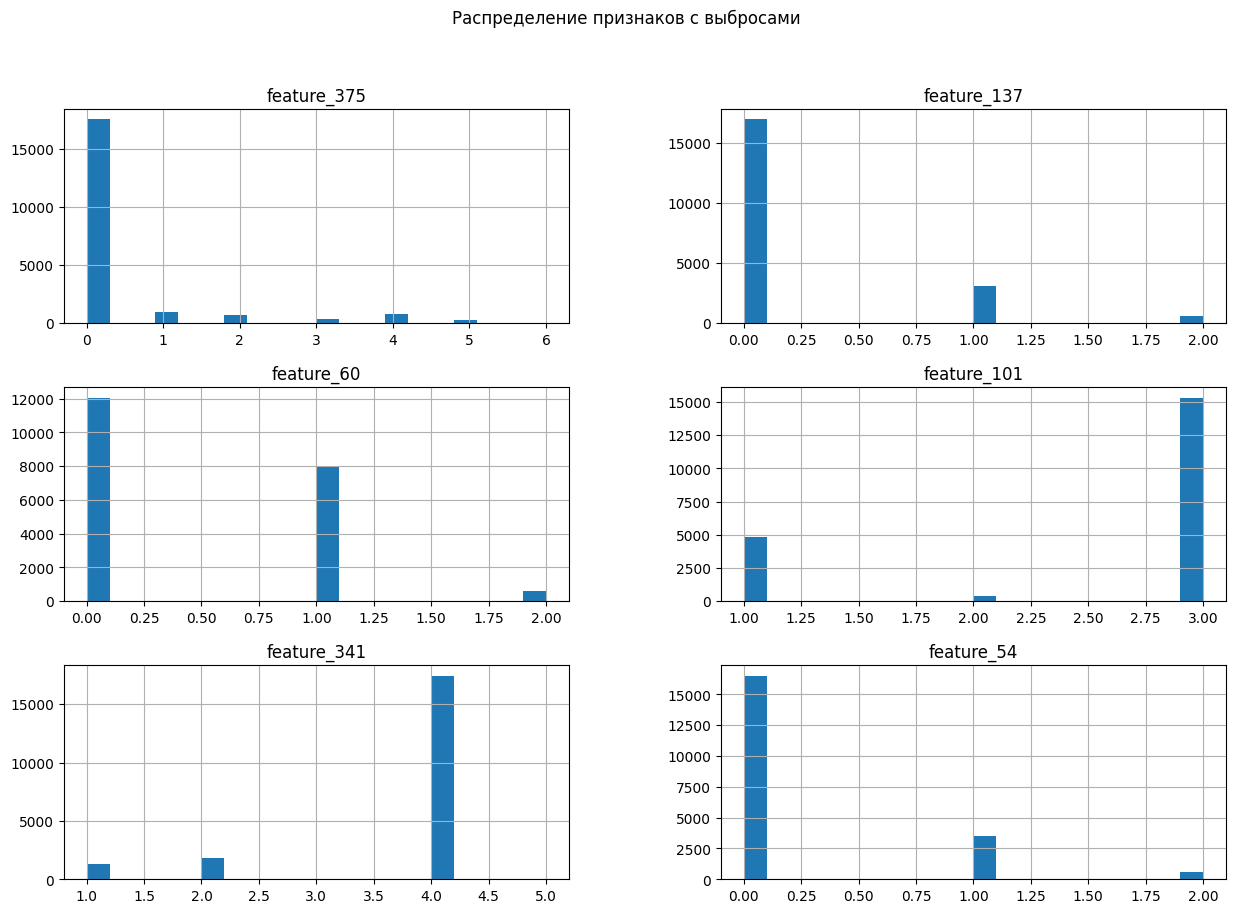

In [11]:
columns = ['feature_375', 'feature_137', 'feature_60', 'feature_101', 'feature_341', 'feature_54']
data[columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Распределение признаков с выбросами")
plt.show()

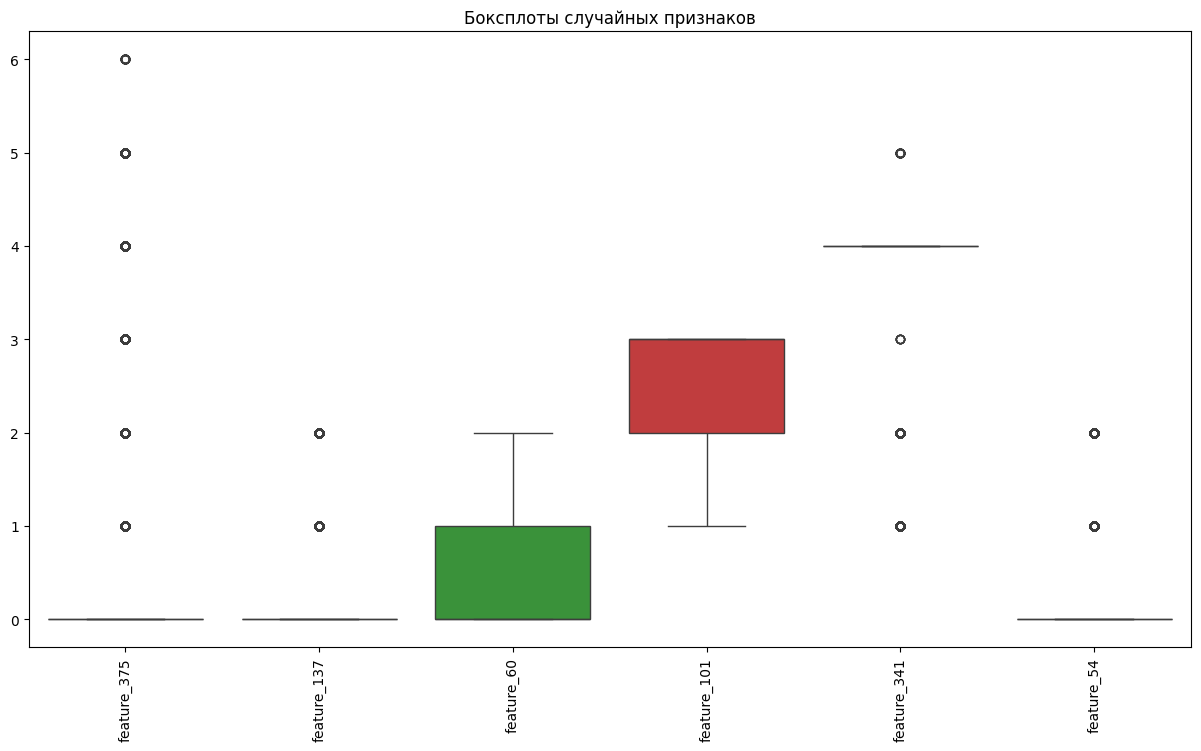

In [12]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[columns])
plt.title("Боксплоты случайных признаков")
plt.xticks(rotation=90)
plt.show()

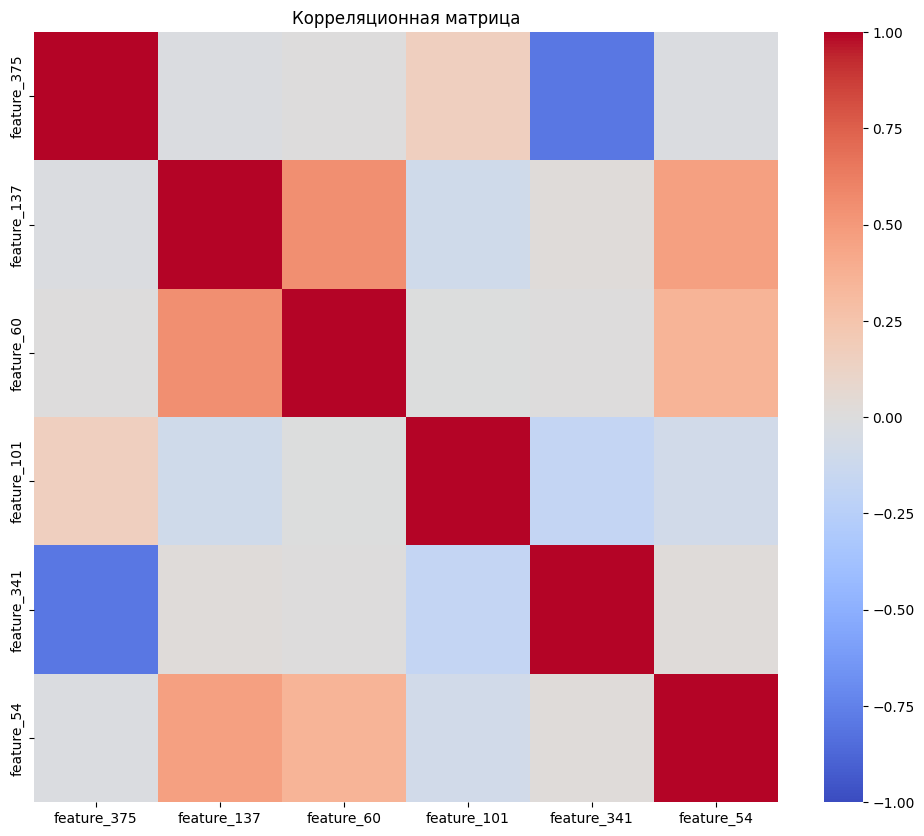

In [13]:
cor_matrix = data[columns].corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier  # или RandomForestRegressor, если задача регрессии
from sklearn.feature_selection import mutual_info_classif

# Задаем целевую переменную (target)
X = data.drop(columns=['target'])  # замените 'target' на название целевой переменной
y = data['target']

# RandomForest для оценки важности признаков
model = RandomForestClassifier(random_state=0)
model.fit(X, y)

RandomForestClassifier(random_state=0)

In [15]:
# Получение важности признаков
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

         Feature  Importance
50    feature_51    0.007160
185  feature_186    0.005384
133  feature_134    0.005112
165  feature_166    0.005089
143  feature_144    0.004522
..           ...         ...
22    feature_23    0.000131
311  feature_312    0.000125
53    feature_54    0.000105
186  feature_187    0.000043
125  feature_126    0.000025

[418 rows x 2 columns]


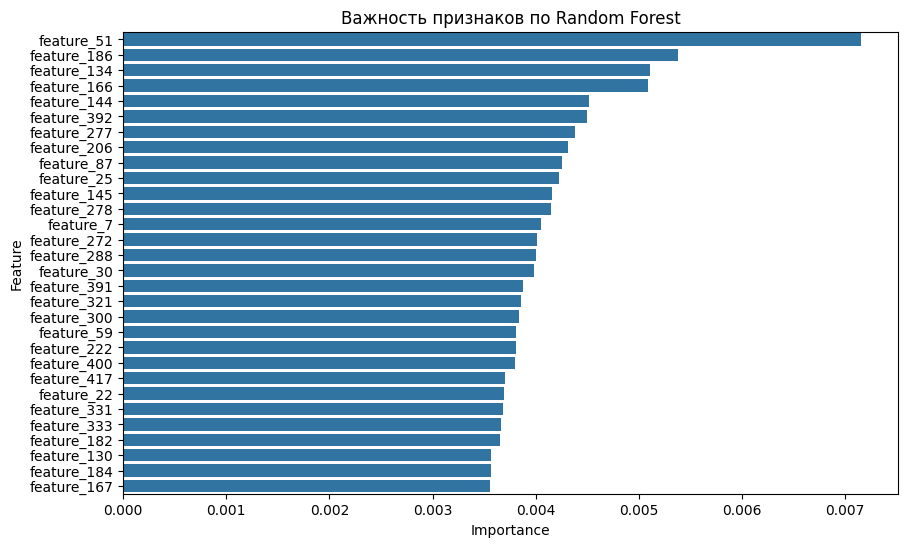

In [16]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(30))
plt.title("Важность признаков по Random Forest")
plt.show()

In [17]:
# Альтернативный метод: mutual information
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_series)

feature_396    0.006534
feature_330    0.006207
feature_101    0.005767
feature_372    0.005551
feature_126    0.005393
                 ...   
feature_1      0.000000
feature_18     0.000000
feature_15     0.000000
feature_22     0.000000
feature_24     0.000000
Length: 418, dtype: float64


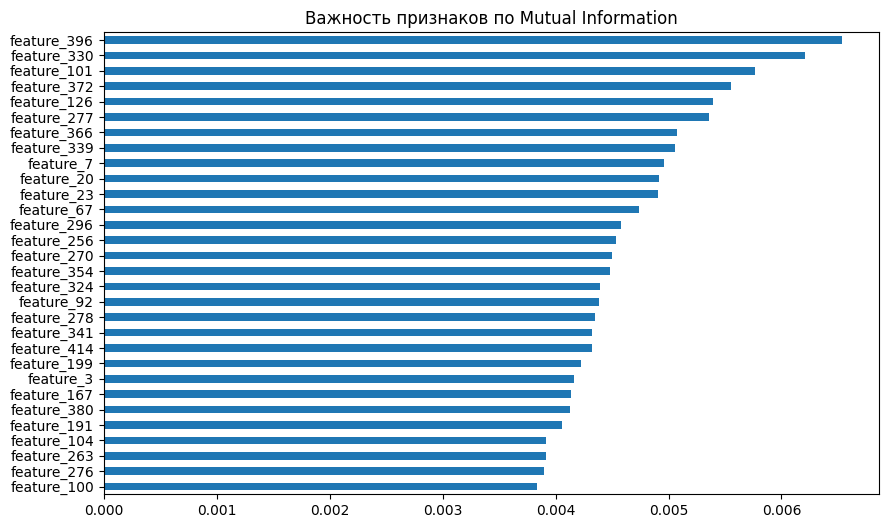

In [18]:
# Визуализация
plt.figure(figsize=(10, 6))
mi_series.head(30).plot(kind='barh')
plt.title("Важность признаков по Mutual Information")
plt.gca().invert_yaxis()
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

# Предположим, что X — это DataFrame с вашими признаками
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Инициализация PCA и подгонка к стандартизированным данным
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

In [36]:
pca_components = pd.DataFrame(pca.components_, columns=X.columns)
pca_components.index = [f'PC{i+1}' for i in range(pca.n_components)]

# Выводим первые компоненты и признаки, которые больше всего на них влияют
print(pca_components)

      feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
PC1    0.006458   0.005272  -0.111064   0.109305   0.043126   0.086682   
PC2   -0.002943  -0.006620  -0.096608   0.035822   0.041617  -0.133866   
PC3   -0.023776   0.000699   0.111902   0.073717  -0.046313  -0.043428   
PC4    0.016384  -0.000791  -0.087834  -0.034579   0.037640   0.021061   
PC5   -0.003072   0.020304  -0.004140  -0.011036   0.004229  -0.012693   
PC6   -0.001495   0.004491   0.048694   0.008562  -0.016285  -0.023393   
PC7   -0.009932  -0.017285  -0.014537  -0.001697   0.003551   0.010473   
PC8   -0.057178  -0.012432  -0.133554  -0.027778   0.071089  -0.019408   
PC9   -0.009957  -0.003869   0.071989  -0.013875  -0.038244  -0.062222   
PC10  -0.011023  -0.016783   0.013170  -0.037034  -0.009800   0.031727   
PC11   0.004397  -0.002682   0.039566   0.009366  -0.020132   0.007454   
PC12  -0.030201  -0.000359  -0.045044  -0.055798   0.038630   0.039194   
PC13  -0.013849  -0.004324  -0.026448 

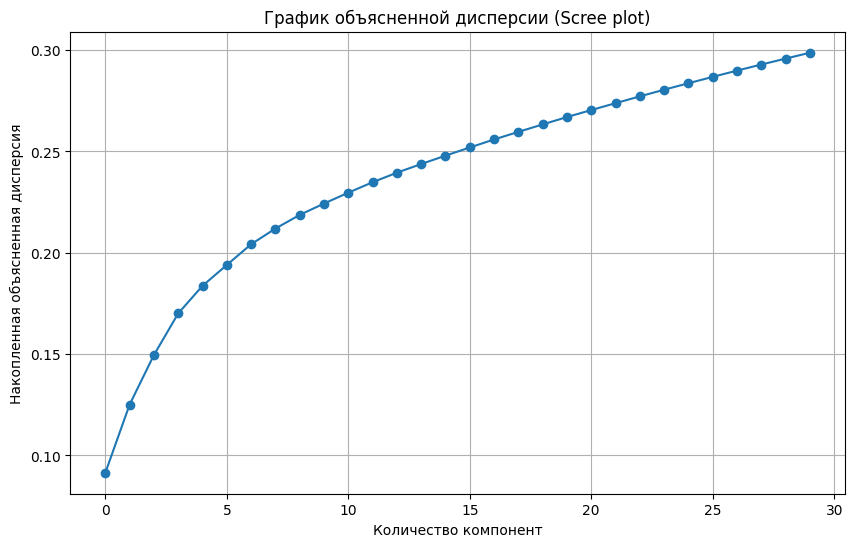

In [37]:
plt.figure(figsize=(10, 6))
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance, marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объясненная дисперсия')
plt.title('График объясненной дисперсии (Scree plot)')
plt.grid(True)
plt.show()